##### SMS Spam Classifier: Multinomial Naive Bayes¶

##### Introduction

The exponential growth of mobile communication has brought with it a rise in spam messages, which can be both annoying and harmful to users. This project utilizes the SMS Spam Collection Dataset, a set of labeled SMS messages classified as either "ham" (legitimate) or "spam" (unwanted/advertising). The dataset is widely used in natural language processing (NLP) and text classification research.



##### Purpose of the Project:

The primary goal of this project is to build a machine learning model that can automatically classify SMS messages as spam or ham based on their content. This involves:

- Preprocessing and cleaning raw text data.

- Converting text into numerical representations suitable for machine learning algorithms.

- Exploring and visualizing the data for patterns and insights.

- Training and evaluating classification models (e.g., Naive Bayes).

- Measuring model performance using appropriate metrics like accuracy, precision, recall and ROC-AUC

The notebook is divided into the following sections:

- Importing and preprocessing data
- Building the model: Multinomial Naive Bayes
- Model building
- Model evaluation

##### Step1:  Importing and Preprocessing Data

In [7]:
import pandas as pd

In [8]:
#reading the training data
docs =pd.read_table('SMSSpamCollection.txt', header = None, names =['Class', 'sms'])

In [9]:
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# counting the number of sms/documents
len(docs)

5572

In [11]:
# counting the ham and spam instances
ham_spam = docs.Class.value_counts()
ham_spam

Class
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
print('spam rate is about {0}%'.format(round((ham_spam[1]/(ham_spam[0]+ham_spam[1]))*100),2))

spam rate is about 13%


C:\Users\91700\AppData\Local\Temp\ipykernel_15052\296624398.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('spam rate is about {0}%'.format(round((ham_spam[1]/(ham_spam[0]+ham_spam[1]))*100),2))


In [13]:
# Mapping labels to 0 and 1
docs['labels'] = docs.Class.map({'ham':1, 'spam':0})

In [14]:
docs.head()

,Class,sms,labels
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [15]:
# dropping the Class column

docs = docs.drop('Class', axis=1)
docs.head()

,sms,labels
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1


In [16]:
# convert to X and y
X = docs.sms
y = docs.labels

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [17]:
# splitting into test and train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1)

In [18]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [19]:
y_train.head()

710     0
3740    1
2711    0
3155    0
3748    1
Name: labels, dtype: int64

In [20]:
# Vetorizing the sentences , stopping the common english words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [21]:
# Fitting the model
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [22]:
# Printing the vocabulary dictionary
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6673,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6665,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6614,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6852,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7127,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6876,
 'wiskey': 7012,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [23]:
# Checking the vocabulary size

len(vect.vocabulary_.keys())

7204

##### Transforming means converts each text message into a sparse numeric vector:

Each word becomes a feature (a column).

Each SMS becomes a row of numbers (frequency or weighted frequency of words).

In [25]:
# transforming the train and test datasets
X_train_transform = vect.transform(X_train)

X_test_transform = vect.transform(X_test)

In [26]:
# Note type of transform is sparse matrix

print(type(X_train_transform))

<class 'scipy.sparse._csr.csr_matrix'>


In [27]:
print(X_train_transform)

  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6673)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7134)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


##### Step2 : Building and evaluation of models

In [29]:
# training the model

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [30]:
# fitting model into the data
mnb.fit(X_train_transform, y_train)

MultinomialNB()

In [31]:
# Predicting class label
y_pred_class = mnb.predict(X_test_transform)

In [32]:
# Predciting probability of class
y_pred_proba = mnb.predict_proba(X_test_transform)

In [33]:
# note alpha=1 is used by default as Laplace Smoothing : prevents zero probabilities for words that don’t appear in the training set for a given class.
mnb

MultinomialNB()

##### Model evaluation

In [35]:
# Checking the overall accuracy score
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [36]:
# Cheking the confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_class)

print(confusion)

[[ 175   10]
 [   7 1201]]


In [37]:
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [38]:
# Sensitivity
TP/float(TP+FN)

0.9942052980132451

In [39]:
# Specificity
TN/float(TN+FP)

0.9459459459459459

In [40]:
# Precision
TP/ float(TP+FP)

0.9917423616845582

In [41]:
# Precision Score
metrics.precision_score(y_test, y_pred_class)

0.9917423616845582

In [42]:
# Recall Score
metrics.recall_score(y_test, y_pred_class)

0.9942052980132451

In [43]:
y_pred_class

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
y_pred_proba

array([[4.76044325e-03, 9.95239557e-01],
       [1.47642544e-04, 9.99852357e-01],
       [7.21214213e-02, 9.27878579e-01],
       ...,
       [3.28799076e-07, 9.99999671e-01],
       [9.99999996e-01, 3.72703622e-09],
       [1.46852511e-08, 9.99999985e-01]])

In [45]:
# Creating an ROC curve

from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [46]:
print(roc_auc)

0.9921872203329157


In [47]:
# matrix for threshold, tpr, fpr
pd.DataFrame({'Thresholds':thresholds, 'FPR': false_positive_rate, 'TPR': true_positive_rate})

,Thresholds,FPR,TPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.000000,0.019868
2,1.000000e+00,0.000000,0.023179
3,1.000000e+00,0.000000,0.028974
4,1.000000e+00,0.000000,0.032285
...,...,...,...
110,1.060833e-15,0.751351,1.000000
111,7.287356e-16,0.762162,1.000000
112,3.096796e-18,0.902703,1.000000
113,2.103079e-18,0.913514,1.000000


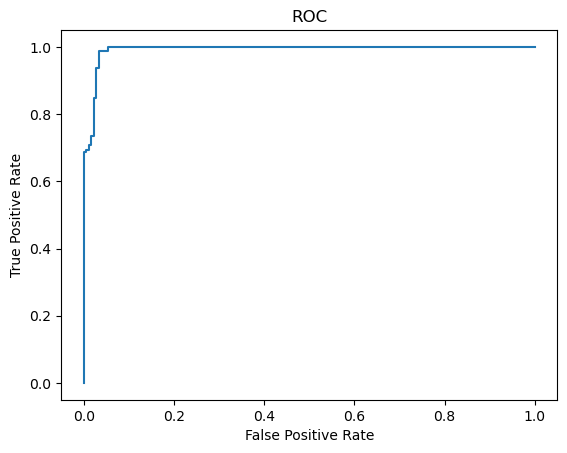

In [48]:
# Plotting the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

##### Conclusion:

In this project, we developed a text classification model using the Multinomial Naive Bayes algorithm, which is particularly well-suited for handling discrete features such as word counts extracted through a Bag-of-Words (CountVectorizer) representation.

After preprocessing the textual data and splitting it into training and test sets, the model was trained and evaluated. The performance metrics demonstrate excellent predictive capability:

Accuracy: 98.78%, indicating that the model correctly classified nearly all test samples.

Confusion Matrix: Shows a low number of both false positives and false negatives, confirming that the model is effective at distinguishing between classes.

ROC-AUC Score: 0.9921, suggesting that the model has an outstanding ability to rank and separate positive and negative classes across all thresholds.

These results confirm that the model is not only accurate but also robust and reliable in identifying the target classes with minimal error. The use of Laplace smoothing (alpha = 1.0) and English stop-word removal contributed to generalization and reduced overfitting.